In [1]:
library(tidyverse)
library(readxl)
library(visdat)
library(ggplot2)
library(dplyr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
# obtain file
raw_enrollment_data <- read_excel("Education_Enrollment.xlsx", col_names = TRUE, skip = 1)
head(raw_enrollment_data)

New names:
* `` -> ...2


Region/Country/Area,...2,Year,Series,Value,Footnotes,Source
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,"Total, all countries or areas",2005,Students enrolled in primary education (thousands),678991.6100,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.9360,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.9214,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Students enrolled in secondary education (thousands),509245.7600,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7318,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (female),62.0691,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."


In [3]:
# select columns, rename ""...2" variable to "Countries"
enrollment_data1 <- raw_enrollment_data %>%
  select("...2" : "Value") %>%
  rename("Countries" = "...2")
head(enrollment_data1)

Countries,Year,Series,Value
<chr>,<dbl>,<chr>,<dbl>
"Total, all countries or areas",2005,Students enrolled in primary education (thousands),678991.6100
"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.9360
"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.9214
"Total, all countries or areas",2005,Students enrolled in secondary education (thousands),509245.7600
"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7318
"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (female),62.0691


In [4]:
# spread data
enrollment_data2 <- spread(enrollment_data1, Series, Value)
head(enrollment_data2)

Countries,Year,Gross enrollement ratio - Primary (male),Gross enrollment ratio - Primary (female),Gross enrollment ratio - Secondary (female),Gross enrollment ratio - Secondary (male),Gross enrollment ratio - Tertiary (female),Gross enrollment ratio - Tertiary (male),Students enrolled in primary education (thousands),Students enrolled in secondary education (thousands),Students enrolled in tertiary education (thousands)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2004,149.6565,65.0020,6.1421,29.4170,0.5213,1.8601,4430.14,594.306,27.648
Afghanistan,2005,126.9444,74.5307,9.3116,28.6331,NA,NA,4318.82,651.453,NA
Afghanistan,2009,118.4504,78.7441,29.3865,60.9922,1.4252,6.0536,4945.63,1716.190,95.185
Afghanistan,2010,120.5552,82.7089,34.2960,68.6471,NA,NA,5279.33,2044.160,NA
Afghanistan,2014,125.6708,88.0897,38.5657,68.5591,3.5854,13.0284,6217.76,2602.730,262.874
Afghanistan,2015,126.2261,87.2409,38.5661,68.4120,NA,NA,6333.70,2698.820,NA


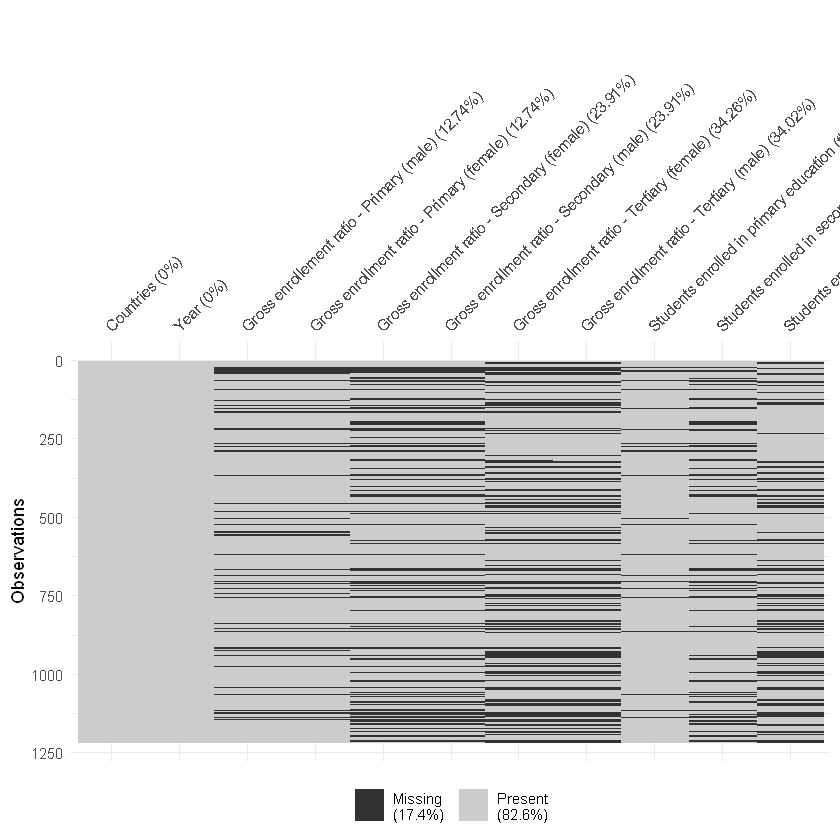

In [5]:
vis_miss(enrollment_data2)

We choose to work on Students enrolled in primary education because it has the least number of missing values and it is an essential level of education that everyone should have

In [6]:
# select variables/columns that are needed and rename column
enrollment_data3 <- enrollment_data2 %>%
    select("Countries", "Year", "Students enrolled in primary education (thousands)") %>%
    rename("Primary_enrollment" = "Students enrolled in primary education (thousands)")
head(enrollment_data3)

Countries,Year,Primary_enrollment
<chr>,<dbl>,<dbl>
Afghanistan,2004,4430.14
Afghanistan,2005,4318.82
Afghanistan,2009,4945.63
Afghanistan,2010,5279.33
Afghanistan,2014,6217.76
Afghanistan,2015,6333.70


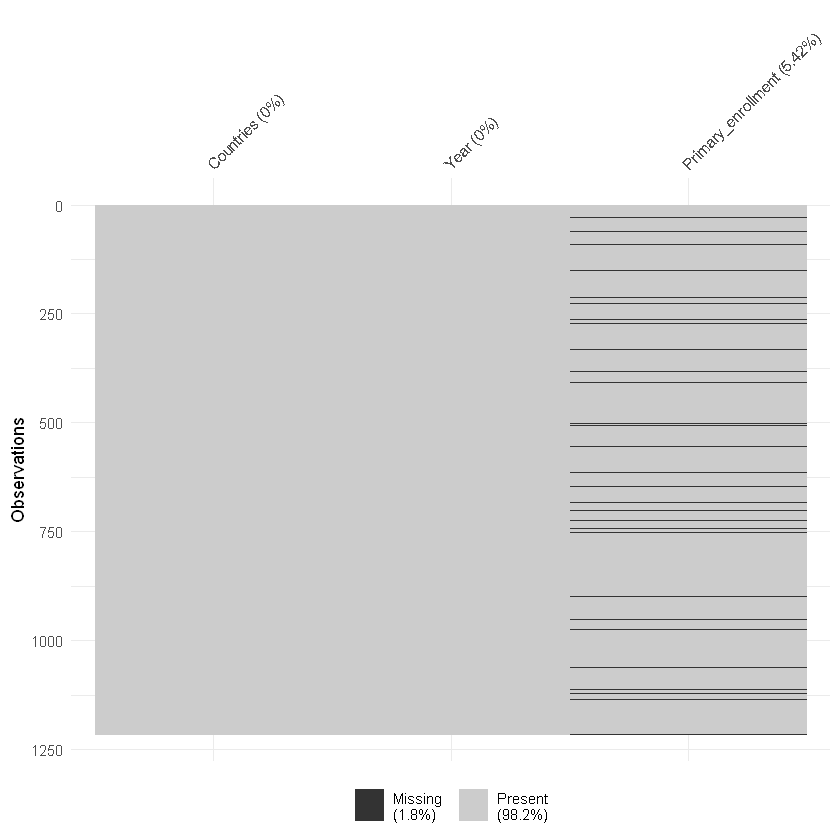

In [7]:
vis_miss(enrollment_data3)

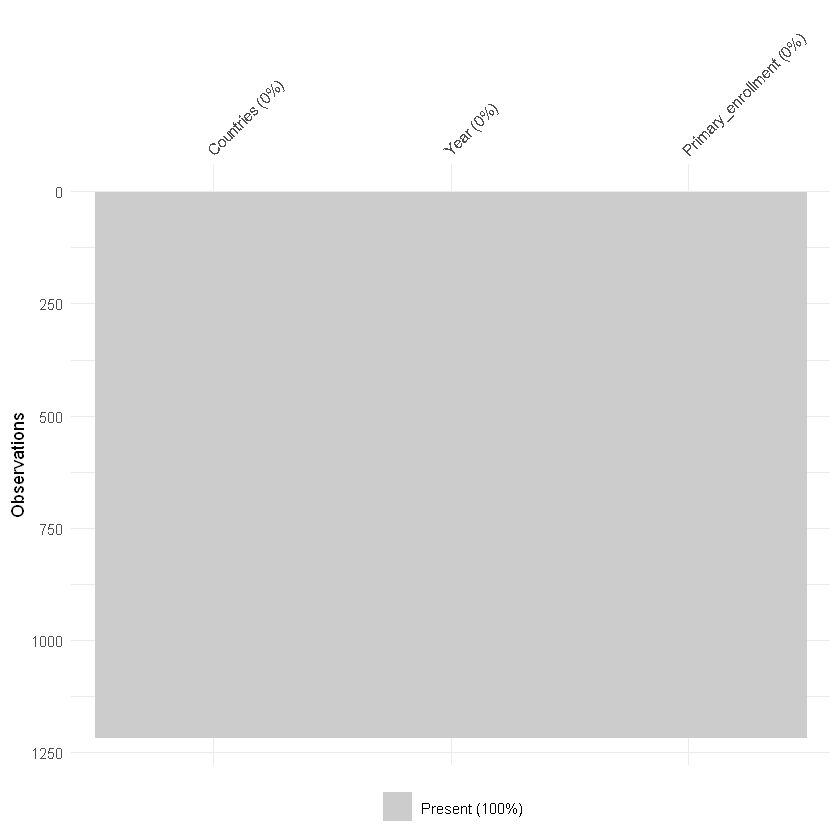

In [8]:
# rename all null values to 0
enrollment_data3[is.na(enrollment_data3)] <- '0'
vis_miss(enrollment_data3)

In [9]:
# omit null values and filter regions out so that only countries are left, then arrange descending by number of primary enrollment
enrollment_data5 <- enrollment_data3 %>%
    na.omit() %>%
    filter(Countries != "Total, all countries or areas") %>%
    filter(Countries != "Southern Asia") %>%
    filter(Countries != "Sub-Saharan Africa") %>%
    filter(Countries != "Eastern Asia") %>%
    filter(Countries != "South-eastern Asia") %>%
    filter(Countries != "Latin America & the Caribbean") %>%
    filter(Countries != "Europe") %>%
    filter(Countries != "Northern America") %>%
    filter(Countries != "Western Asia") %>%
    filter(Countries != "Northern Africa")%>%
    arrange(desc(Primary_enrollment))

enrollment_data5

Countries,Year,Primary_enrollment
<chr>,<dbl>,<chr>
Togo,2005,996.707
Bhutan,2005,99.458
Bhutan,2015,99.291
Guyana,2010,99.241
China,2013,98870.82
Jordan,2014,979.792
Romania,2005,970.295
Solomon Islands,2012,97.547
China,2015,95958.04


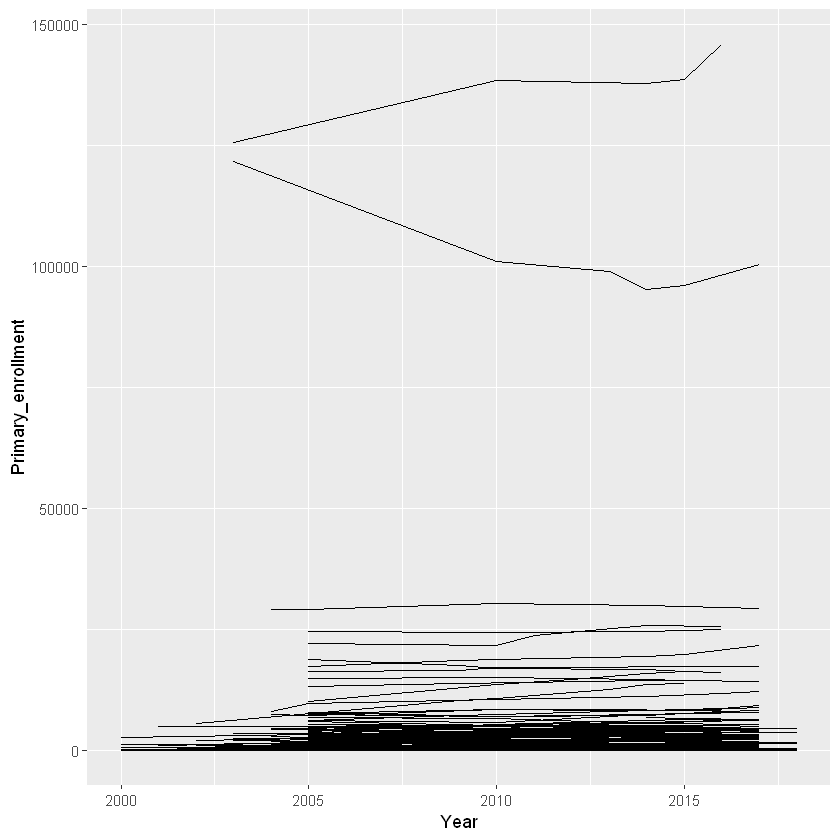

In [8]:
# plot primary enrollment for all countries in the world
ggplot(enrollment_data5, aes(x=Year, y=Primary_enrollment, group=Countries)) + geom_line()

The top 2 countries with highest number of primary enrollment are India and China. It is reasonable because they have the highest populations in the world. Ranking after those 2 countries are Indonesia, Nigeria, United States of America and Pakistan.

Countries,Year,Primary_enrollment
<chr>,<dbl>,<chr>
New Zealand,2005,352.845
New Zealand,2010,348.492
New Zealand,2014,360.206
New Zealand,2015,368.306
New Zealand,2017,384.251


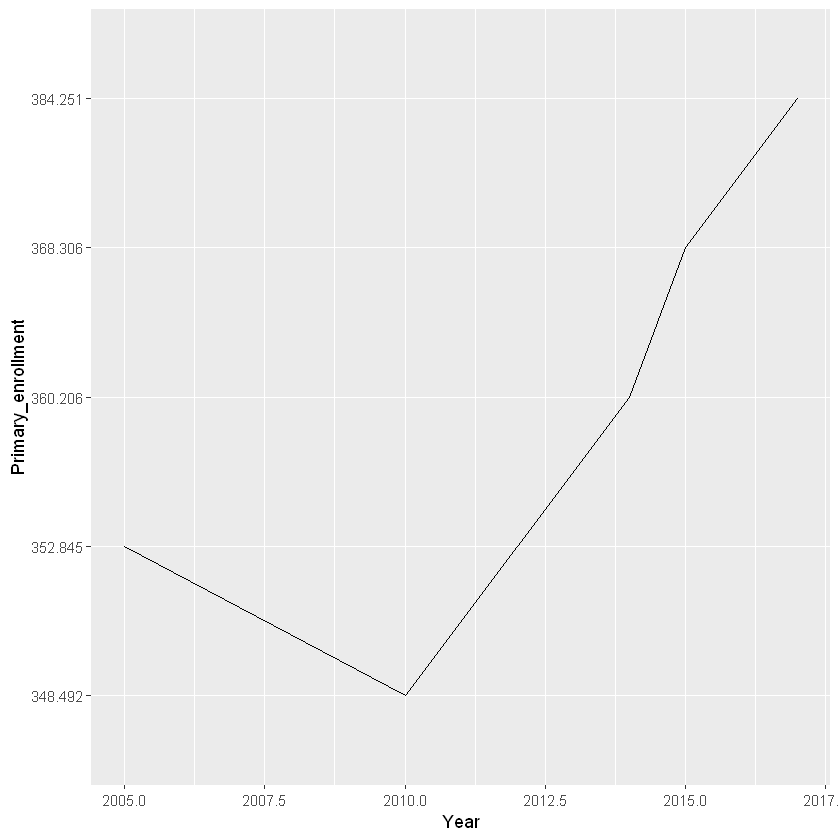

In [16]:
NewZealand <- enrollment_data3 %>%
    na.omit() %>%
    filter(Countries == "New Zealand")
NewZealand
ggplot(NewZealand, aes(x=Year, y=Primary_enrollment, group=Countries)) + geom_line()

New Zealand has very low primary enrollment. The maximum is 384,251 people enrolled in primary. There is a big drop in 2010 but since then it has been increasing quite steady. New Zealand government is doing well in increasing people attending primary schools.

In [16]:
# create final wrangled data
write_csv(enrollment_data5, path = "C:\\Users\\kim_w\\Education_enrollment_Wrangled.csv")